# 2 Poisson Process

## Poisson Flow

Denote $N(t)$ to be the number of events that occur in the interval $[0, t]$. The process $\{N(t), t \geq 0\}$ is called a Poisson flow with rate $\lambda$ if it has the following properties:

1. Stationary (平稳的) increment: for arbitrary $t>s$, $N(t)-N(s)$ has the same distribution as $N(t-s)$.

2. Independent increment: for arbitrary $t>s$, $N(t)-N(s)$ is independent of $N(s)$.

3. Rare event: 
   
$$\begin{aligned}\mathbb P\left(N(t+\Delta t) - N(t)=1\right) &= \lambda\Delta t + o(\Delta t)
\\ \mathbb P\left(N(t+\Delta t) - N(t)\geqslant 2\right) &=  o(\Delta t)
\end{aligned}$$


### Examples

For example, the number of customers arriving at a store in a given time interval can be simulated by Poisson flow.

<br>

## Poisson Process

**Theorem** If $N(t)$ flows a Poisson flow with rate $\lambda$, then $N(t)\sim \text{Poisson}(\lambda t)$. That is, $\mathbb P(N(t)=k) = \frac{(\lambda t)^k}{k!}e^{-\lambda t}$.


<!-- We introduce two methods to prove this theorem. -->

**Proof** Fixing $t$, we slice the interval $[0, t]$ into $n$ subintervals with equal length $\Delta t = \frac tn$. Denote $N_i$ to be the number of events that occur in the $i$-th subinterval. For each subinterval, it is easy to see by stationarity that $\mathbb P(N_i=1) = \lambda\Delta t + o(\Delta t)$ and $\mathbb P(N_i=0) =1-\lambda\Delta t+ o(\Delta t)$. By independence, we have (when $n\rightarrow\infty$)

$$\begin{aligned}\mathbb P(N(t)=k) &= \sum_{\exists N_i\geqslant 2}P(N(t)=k)+ \sum_{\forall N_i\leqslant 1}P(N(t)=k)=o(\Delta t)+ \sum_{\forall N_i\leqslant 1}P(N(t)=k)
\\ &= o(1)+ \binom{n}{k}\cdot \left(\frac{\lambda t}{n}+o(n^{-1})\right)^k\left(1-\frac{\lambda t}{n}+o(n^{-1})\right)^{n-k}
\\ &= o(1)+\frac{n^k}{k!}(1+o(1))\cdot \frac{(\lambda t)^k}{n^k}(1+o(1))\cdot (e^{-\lambda t}+o(1))
\\ & \rightarrow  \frac{(\lambda t)^k}{k!}e^{-\lambda t}.
\end{aligned}$$

<br>

Particularly, $\mathbb P(N(0)=0)=1$ in a Poisson process.


### Statistics of Poisson Process

* Mean: $\dfrac{\mathbb E N(t)}{t} = \lambda$.

* Variance: ${\rm Var}(N(t)) = \lambda t$.
  
* Correlation: $\mathbb E(N(t)N(s)) = \lambda^2ts + \lambda \min\{t,s\}$.

**Proof** Without loss of generality, we assume $s< t$. Note that $N(t)-N(s)$ and $N(t)$ are independent.

$$\begin{aligned}\mathbb E(N(t)N(s)) &= \mathbb E(N(s)(N(s)+N(t)-N(s))) = \mathbb E(N(s)^2) + \mathbb EN(s)\mathbb EN(t-s)\\ &=(\lambda s+\lambda^2s^2)+\lambda^2s(t-s) = \lambda^2ts+\lambda s.\end{aligned}$$

### Joint Distribution

For timestamp $0=t_0<t_1<t_2<\dotsc<t_n$ and value $0=m_0\leqslant m_1\leqslant m_2\leqslant m_n$. By independence, we have

$$\mathbb P(N(t_1)=m_1,\dotsc, N(t_n)=m_n)= \prod_{j=1}^n \frac{(\lambda (t_j - t_{j-1}))^{m_j-m_{j-1}}e^{-\lambda (t_j - t_{j-1})}}{(m_j - m_{j-1})!}.$$

## Arrival and Waiting

### Arrival Time

If $N(t)=k$, then there are $k$ events before time $t$. Denote $s_i$ be the occurrence time of the $i$-th event. We call it the arrival time.

**Theorem** If $N(t)$ flows a Poisson flow with rate $\lambda$, then $s_n\sim \Gamma(n,\lambda)$ follows a Gamma distribution. That is, the P.D.F. is $f_{s_n}(t) = \frac{\lambda^n t^{n-1}}{(n-1)!}e^{-\lambda t}$.

**Proof** We have $\mathbb P(s_n\leqslant t) = \mathbb P(N(t)\geqslant n) = 1-\mathbb P(N(t)<n) = 1-\sum_{k=0}^{n-1}\frac{(\lambda t)^k}{k!}e^{-\lambda t}$. Its P.D.F. is given by
$$f_{s_n}(t) = \frac{\partial}{\partial t}\left(1 - \sum_{k=0}^{n-1}\frac{(\lambda t)^k}{k!}e^{-\lambda t}\right) =\lambda e^{-\lambda t}-\sum_{k=1}^{n-1}\left(\frac{\lambda^k t^{k-1}}{(k-1)!}-\frac{\lambda^{k+1} t^{k}}{k!}\right)e^{-\lambda t} = \frac{\lambda^n t^{n-1}}{(n-1)!}e^{-\lambda t}.$$


<!-- Then $s_1,\dotsc, s_k$ are i.i.d. random variables with distribution $\text{Exponential}(\lambda)$. -->


### Waiting Time

Waiting time is the gap of two events, $x_i = s_i - s_{i-1}$. Additionally we define $s_0 = 0$ and $x_0 = 0$.

**Theorem** If $N(t)$ flows a Poisson flow with rate $\lambda$, then $x_n\sim \text{Exp}(\lambda)$ follows an exponential distribution. That is, $\mathbb P(x_n>t) = e^{-\lambda t}$.

**Proof**

$$\begin{aligned}\mathbb P(x_n>t) &= \mathbb P(s_n-s_{n-1}>t) = \int_0^\infty \mathbb P(s_n>t+s|s_{n-1}=s)f_{s_{n-1}}(s)ds\\ &=\int_0^\infty \mathbb P(N(t+s) - N(s) = 0)f_{s_{n-1}}(s)ds\\ &= e^{-\lambda t}\int_0^\infty f_{s_{n-1}}(s)ds= e^{-\lambda t}.\end{aligned}$$

**Theorem** The waiting time are independent: $x_1,\dotsc,x_n$ are i.i.d.

<br>

Reversely, to construct a Poisson process, we can first sample i.i.d. exponential random variable $x_i$ as the waiting time. Then we compute the arrival time by $s_i = \sum_{k\leqslant i}x_k$.

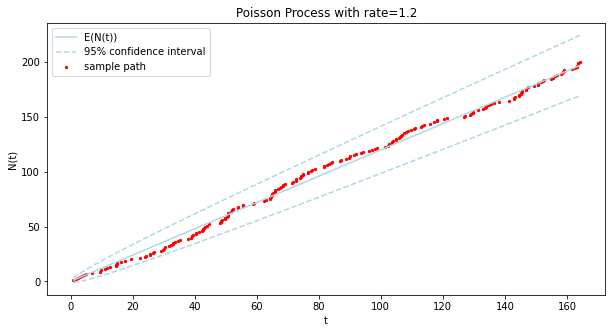

In [44]:
from matplotlib import pyplot as plt
import numpy as np

# generate waiting time using exponential distribution
n = 200
rate = 1.2
np.random.seed(0)

waiting_time = np.random.exponential(scale=1./rate, size=n) # be careful scale = 1/rate
arrival_time = np.cumsum(waiting_time)

xaxis = np.linspace(1,arrival_time.max(),1000)
expectance = xaxis * rate
confidence_interval = 1.96 * np.sqrt(expectance) # 95% confidence interval

plt.figure(figsize = (10, 5))
plt.scatter(arrival_time, range(1, n+1), s=5, label='sample path', color='red')
plt.plot(xaxis, expectance, label='E(N(t))', color='lightblue')
plt.plot(xaxis, expectance + confidence_interval, label='95% confidence interval', color='lightblue', linestyle='--')
plt.plot(xaxis, expectance - confidence_interval, color='lightblue', linestyle='--')
[plt.xlabel('t'), plt.ylabel('N(t)'), plt.title('Poisson Process with rate={}'.format(rate)), plt.legend()]
plt.show()

## Conditional Distribution

### Conditional Arrival

**Theorem** Given $N(t)=n$, then the joint conditional distribution of $(s_1,\dotsc,s_n)$ is **uniform** over the set $0\leqslant s_1<\dotsc<s_n\leqslant t$ with conditional probability density function $f_{(s_1,\dotsc,s_n)|N(t)=n} = \dfrac{n!}{t^n}$. It is equivalent to the order statistics of $n$ i.i.d. uniform random variables over $[0,t]$.

$$(s_1,\dotsc,s_n)\sim_d (u_{(1)},\dotsc,u_{(n)}).$$

**Proof** For any $s_1,\dotsc,s_n$ satisfies that $0\leqslant s_1<\dotsc<s_n\leqslant t$, we have
$$\begin{aligned}f(s_1,s_2,\dotsc,s_n|N(t)=n)&= \frac{f_{x_1}(s_1)f_{x_2}(s_2-s_1)\dotsm f_{x_n}(s_n-s_{n-1})\cdot\mathbb P(x_{n+1}> t-s_n)}{\mathbb P(N(t)=n)}
\\ & = \frac{\lambda e^{-\lambda s_1}\cdot \lambda e^{-\lambda (s_2-s_1)}\dotsm \lambda e^{-\lambda (s_n - s_{n-1})}\cdot e^{-\lambda (t-s_n)}}{\frac{(\lambda t)^ne^{-\lambda t}}{n!}} = \frac{n!}{t^n}.\end{aligned}$$

The density is independent of $s_1,\dotsc,s_n$. Therefore, the joint conditional distribution is uniform.


### Conditional Count

**Theorem** Given $N(t)=n$, for time $s<t$, the conditional distribution of $N(s)$ is $\text{Binomial}(n, \frac st)$. That is, $\mathbb P(N(s)=k|N(t)=n) = \binom{n}{k}\left(\frac st\right)^k\left(1-\frac st\right)^{n-k}$.

**Proof** 

$$\begin{aligned}\mathbb P(N(s)=k|N(t) = n) &= \frac{\mathbb P(N(s)=k,N(t)=n)}{\mathbb P(N(t)=n)}= \frac{\mathbb P(N(s)=k)\mathbb P(N(t-s)=n-k)}{\mathbb P(N(t)=n)}
\\ & = \frac{\frac{(\lambda s)^ke^{-\lambda s}}{k!}\frac{(\lambda (t-s))^{n-k}e^{-\lambda (t-s)}}{(n-k)!}}{\frac{(\lambda t)^ne^{-\lambda t}}{n!}}= \binom{n}{k}\left(\frac st\right)^k\left(1-\frac st\right)^{n-k}.\end{aligned}$$

## Superposition and Decomposition

### Superposition

Suppose we have $N_1(t),\dotsc,N_m(t)$ are $m$ independent Poisson processes with rate $\lambda_1,\dotsc,\lambda_m$ respectively. Then we define $N(t) =\sum_{i=1}^m N_i(t)$ to be the superposition (合成) of these $m$ processes.

**Theorem** $N(t)$ is a homogeneous Poisson process with rate $\lambda= \sum_{i=1}^m\lambda_i$.

<!-- **Proof** Trivial from the definition of Poisson flow. -->


**Theorem** Given $N(t)=n$, the conditional distribution of $N_i(t)|(N(t)=n)$ is the binomial distribution $B(n,\frac{\lambda_i}{\lambda})$.


### Decomposition

For a Poisson process $N(t)$ with rate $\lambda$, if each event is one of $m$ types with probability $p_1,\dotsc,p_m$ respectively, then we can define $N_i(t)$ to be the number of events of type $i$ before time $t$.

**Theorem** Each $N_i(t)$ is a homogeneous Poisson process with rate $\lambda_i = p_i\lambda$.


**Theorem** $N_1,\dotsc,N_m$ are independent.